In [47]:
#Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import sklearn.neighbors as nb

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, validation_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from statsmodels.stats.proportion import proportion_confint


from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 3)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
data = pd.read_csv('./data/Train.csv', sep=',', na_values=".")

In [49]:
data.describe(include='all')

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
count,3000,3000.000,3000.000,3000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000,3000,1799,3000,1701,1802,1549,3000.000,3000,3000,3000.000,3000.000,3000.000,2373,3000,3000.000,3000.000
unique,2,NaN,NaN,1606,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,4,3,2,3,NaN,4,3,NaN,NaN,NaN,3,3,NaN,NaN
top,Female,NaN,NaN,135/93,NaN,NaN,NaN,NaN,NaN,NaN,Moderate,Former,Occasional,Balanced,Hypertension,Regular,Diabetes,NaN,Good,Normal,NaN,NaN,NaN,Undergraduate,Medium,NaN,NaN
freq,1511,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,1407,1181,1057,1183,676,1063,645,NaN,1073,1519,NaN,NaN,NaN,884,1223,NaN,NaN
mean,NaN,168.591,72.537,NaN,234.030,25.550,126.654,0.932,0.475,47.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.868,NaN,NaN,5.477,5.029,5.956,NaN,NaN,53.486,1.219
std,NaN,9.293,13.191,NaN,24.521,4.367,18.226,0.444,0.210,14.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.756,NaN,NaN,2.585,2.871,3.475,NaN,NaN,20.570,0.721
min,NaN,141.131,32.538,NaN,148.812,12.050,69.867,-0.220,0.200,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.382,NaN,NaN,1.000,0.006,0.002,NaN,NaN,18.000,0.000
25%,NaN,161.630,63.223,NaN,216.757,22.454,114.393,0.561,0.282,36.735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.648,NaN,NaN,3.222,2.607,2.873,NaN,NaN,36.000,1.000
50%,NaN,168.216,71.449,NaN,234.377,25.352,126.802,0.940,0.462,46.964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.015,NaN,NaN,5.497,5.096,5.957,NaN,NaN,53.000,1.000
75%,NaN,175.523,81.703,NaN,250.647,28.404,139.377,1.295,0.639,56.829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.087,NaN,NaN,7.680,7.476,8.991,NaN,NaN,72.000,2.000


In [50]:
# Eliminar la columna de les edats irrellevants pel problema
data = data.drop(['Age (years)'], axis=1)
print(data[:5])

   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  Cholesterol Level (mg/dL)     BMI  Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB) Physical Activity Level Smoking Status Alcohol Consumption        Diet Chronic Diseases Medication Use Family History  Cognitive Function Mental Health Status Sleep Patterns  Stress Levels  Pollution Exposure  Sun Exposure Education Level Income Level  Age_group
0    Male      171.148       86.185              151/109                    259.466  29.423                      157.653                 0.133             0.200                58.786                Moderate         Former                 NaN    Low-carb              NaN            NaN            NaN              44.059                 Good       Insomnia          2.797               5.142         7.109             NaN       Medium          2
1    Male      172.946       79.642              134/112                    263.630  26.627                 

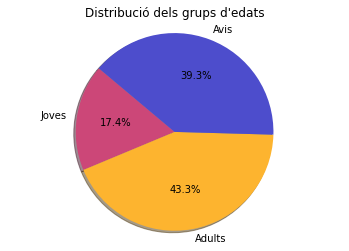

In [51]:
jove = len(data[data['Age_group'] == 0])
adult = len(data[data['Age_group'] == 1])
avi = adults = len(data[data['Age_group'] == 2])

#pie chart
labels = ['Joves', 'Adults', 'Avis']
sizes = [jove, adult, avi]
colors2=[(0.798216, 0.280197, 0.469538, 1.0), (0.993814, 0.704741, 0.183043, 1.0), (0.3, 0.3, 0.8)]

plt.pie(sizes, labels=labels, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Distribució dels grups d'edats")
plt.show()

In [52]:
#Comprovar quins camps tenen valors nulls
data.isnull().any()

Gender                         False
Height (cm)                    False
Weight (kg)                    False
Blood Pressure (s/d)           False
Cholesterol Level (mg/dL)      False
BMI                            False
Blood Glucose Level (mg/dL)    False
Bone Density (g/cm²)           False
Vision Sharpness               False
Hearing Ability (dB)           False
Physical Activity Level        False
Smoking Status                 False
Alcohol Consumption             True
Diet                           False
Chronic Diseases                True
Medication Use                  True
Family History                  True
Cognitive Function             False
Mental Health Status           False
Sleep Patterns                 False
Stress Levels                  False
Pollution Exposure             False
Sun Exposure                   False
Education Level                 True
Income Level                   False
Age_group                      False
dtype: bool

In [53]:
values = {"Alcohol Consumption": 'Never', "Chronic Diseases": 'No Disease', "Medication Use": 'No', "Family History": 'No Disease', "Education Level": 'No Education'}
data = data.fillna(value=values)
data.isnull().any()

Gender                         False
Height (cm)                    False
Weight (kg)                    False
Blood Pressure (s/d)           False
Cholesterol Level (mg/dL)      False
BMI                            False
Blood Glucose Level (mg/dL)    False
Bone Density (g/cm²)           False
Vision Sharpness               False
Hearing Ability (dB)           False
Physical Activity Level        False
Smoking Status                 False
Alcohol Consumption            False
Diet                           False
Chronic Diseases               False
Medication Use                 False
Family History                 False
Cognitive Function             False
Mental Health Status           False
Sleep Patterns                 False
Stress Levels                  False
Pollution Exposure             False
Sun Exposure                   False
Education Level                False
Income Level                   False
Age_group                      False
dtype: bool

In [54]:
# Comprovació de la existència de files duplicades
files_duplicades = data[data.duplicated(keep = False)]
print("Numero de files duplicades:" + str(files_duplicades.sum()))

Numero de files duplicades:Gender                           0
Height (cm)                    0.0
Weight (kg)                    0.0
Blood Pressure (s/d)             0
Cholesterol Level (mg/dL)      0.0
BMI                            0.0
Blood Glucose Level (mg/dL)    0.0
Bone Density (g/cm²)           0.0
Vision Sharpness               0.0
Hearing Ability (dB)           0.0
Physical Activity Level          0
Smoking Status                   0
Alcohol Consumption              0
Diet                             0
Chronic Diseases                 0
Medication Use                   0
Family History                   0
Cognitive Function             0.0
Mental Health Status             0
Sleep Patterns                   0
Stress Levels                  0.0
Pollution Exposure             0.0
Sun Exposure                   0.0
Education Level                  0
Income Level                     0
Age_group                        0
dtype: object


In [55]:
# Canviar de tipus categòric a numeral

gender_st = {'Male': 0, 'Female': 1}
data.replace({"Gender": gender_st}, inplace=True)
status_st = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
data.replace({"Mental Health Status": status_st}, inplace=True)
smoking_st = {'Current': 0, 'Former': 1, 'Never': 2}
data.replace({"Smoking Status": smoking_st}, inplace=True)
drinking_st = {'Frequent': 0, 'Occasional': 1, 'Never': 2}
data.replace({"Alcohol Consumption": drinking_st}, inplace=True)
medication_st = {'Regular': 0, 'Occasional': 1, 'No': 2}
data.replace({"Medication Use": medication_st}, inplace=True)
physical_st = {'Low': 0, 'Moderate': 1, 'High': 2}
data.replace({"Physical Activity Level": physical_st}, inplace=True)
diet_st = {'High-fat': 0, 'Low-carb': 1, 'Vegetarian': 2, 'Balanced': 3}
data.replace({"Diet": diet_st}, inplace=True)
sleep_st = {'Insomnia': 0, 'Normal': 1, 'Excessive': 2}
data.replace({"Sleep Patterns": sleep_st}, inplace=True)
income_st = {'Low': 0, 'Medium': 1, 'High': 2}
data.replace({"Income Level": income_st}, inplace=True)
education_st = {'No Education': 0, 'Undergraduate': 1, 'High School': 2, 'Postgraduate': 3}
data.replace({"Education Level": education_st}, inplace=True)
chronic_st = {'No Disease': 0, 'Hypertension': 1, 'Diabetes': 2, 'Heart Disease': 3}
data.replace({"Chronic Diseases": chronic_st}, inplace=True)
data.replace({"Family History": chronic_st}, inplace=True)

In [56]:
for i,element in zip(range(len(data['Blood Pressure (s/d)'])),data['Blood Pressure (s/d)']):
    valors = element.split('/')
    estat = 0
    systolic = int(valors[0])
    diastolic = int(valors[1])
    if systolic < 120 and diastolic < 80:
        estat = 0 #healthy
    elif systolic >= 120 and systolic <= 129 and diastolic < 80:
        estat = 1 #elevated
    elif systolic >= 130 and systolic <= 139 or diastolic >= 80 and diastolic <= 89:
        estat = 2 # hypertension 1
    else:
        estat = 3 #hypertension 2
    data.loc[i, 'Blood Pressure (s/d)'] = int(estat)
print(data[:5])

   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  Cholesterol Level (mg/dL)     BMI  Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  Physical Activity Level  Smoking Status  Alcohol Consumption  Diet  Chronic Diseases  Medication Use  Family History  Cognitive Function  Mental Health Status  Sleep Patterns  Stress Levels  Pollution Exposure  Sun Exposure  Education Level  Income Level  Age_group
0       0      171.148       86.185                    3                    259.466  29.423                      157.653                 0.133             0.200                58.786                        1               1                    2     1                 0               2               0              44.059                     2               0          2.797               5.142         7.109                0             1          2
1       0      172.946       79.642                    2                    263.630  26.627         

<Axes: >

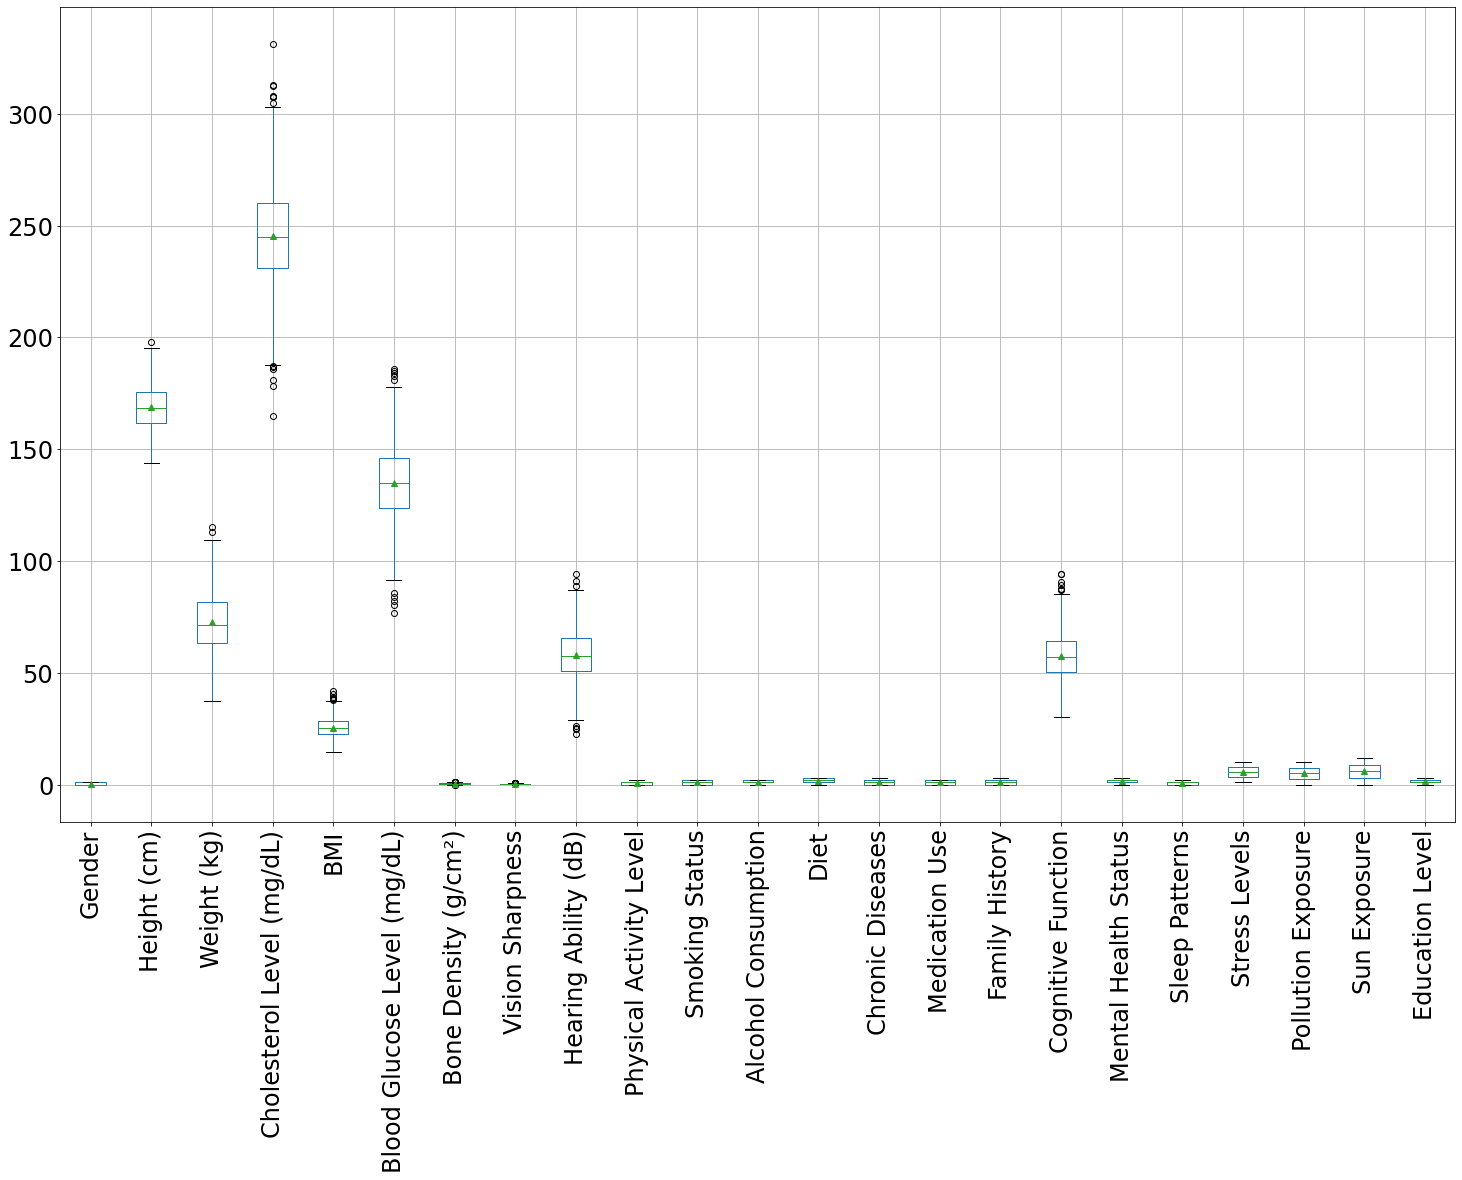

In [57]:
avis = data[data['Age_group'] == 2]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(avis.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
avis.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

<Axes: >

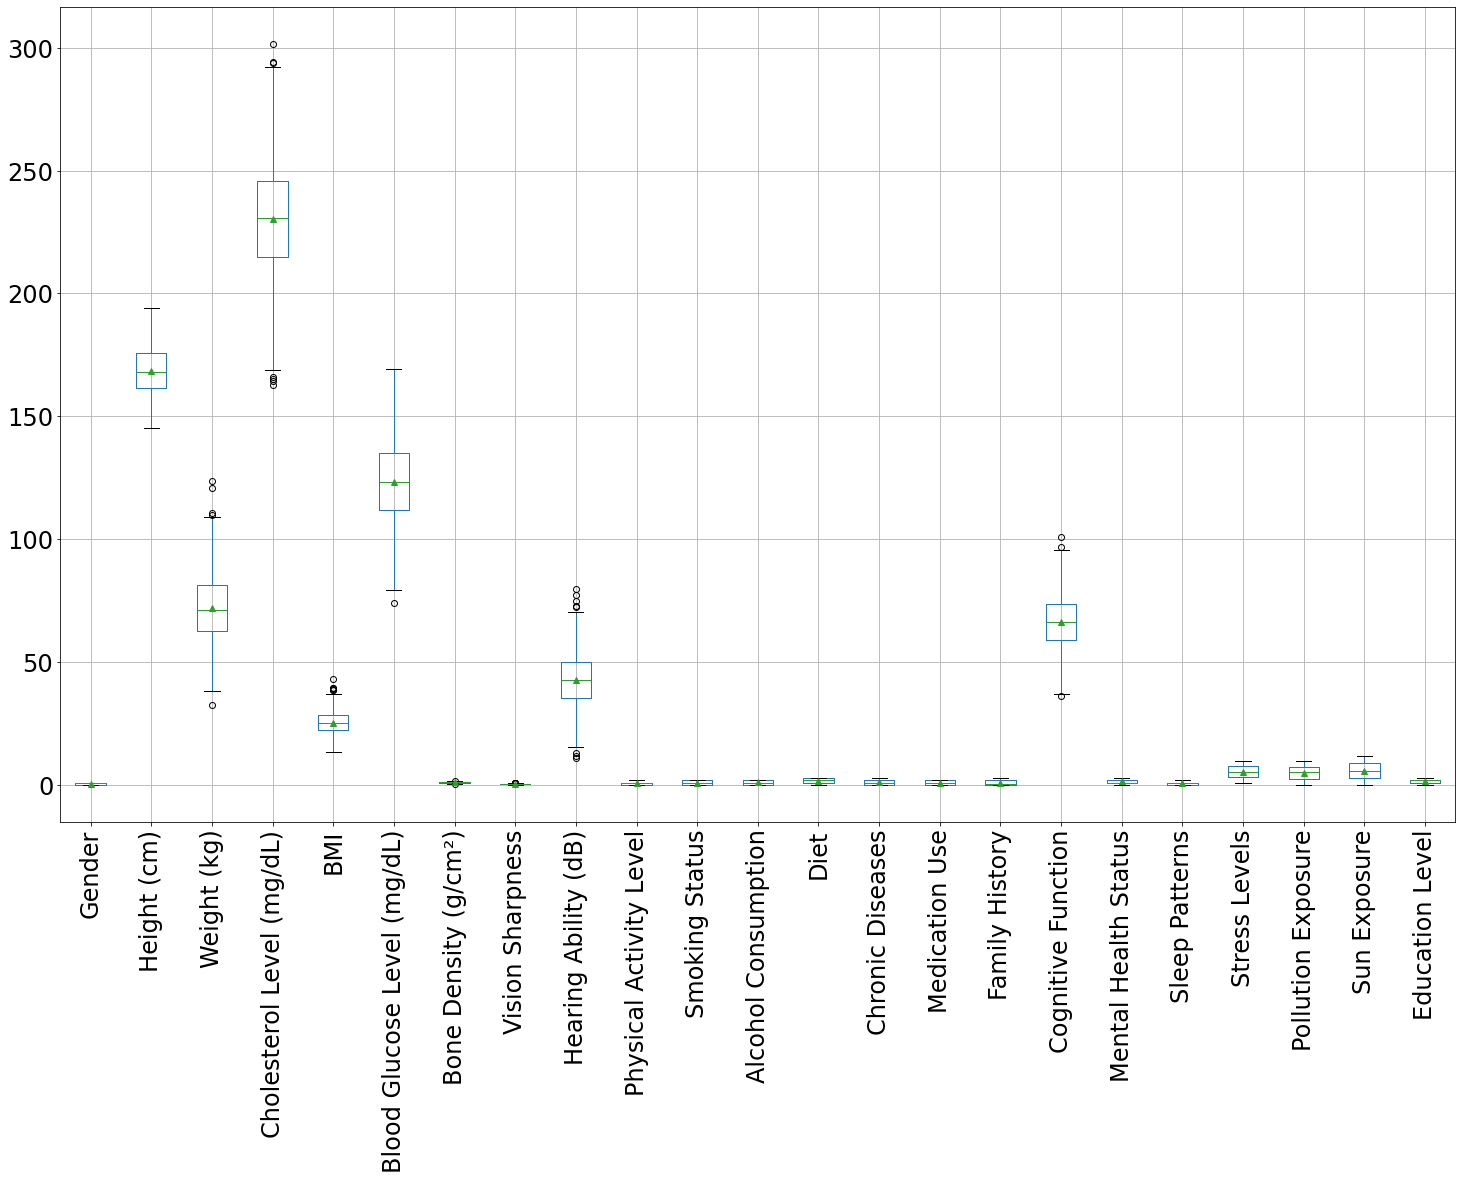

In [58]:
adults = data[data['Age_group'] == 1]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(adults.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
adults.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

<Axes: >

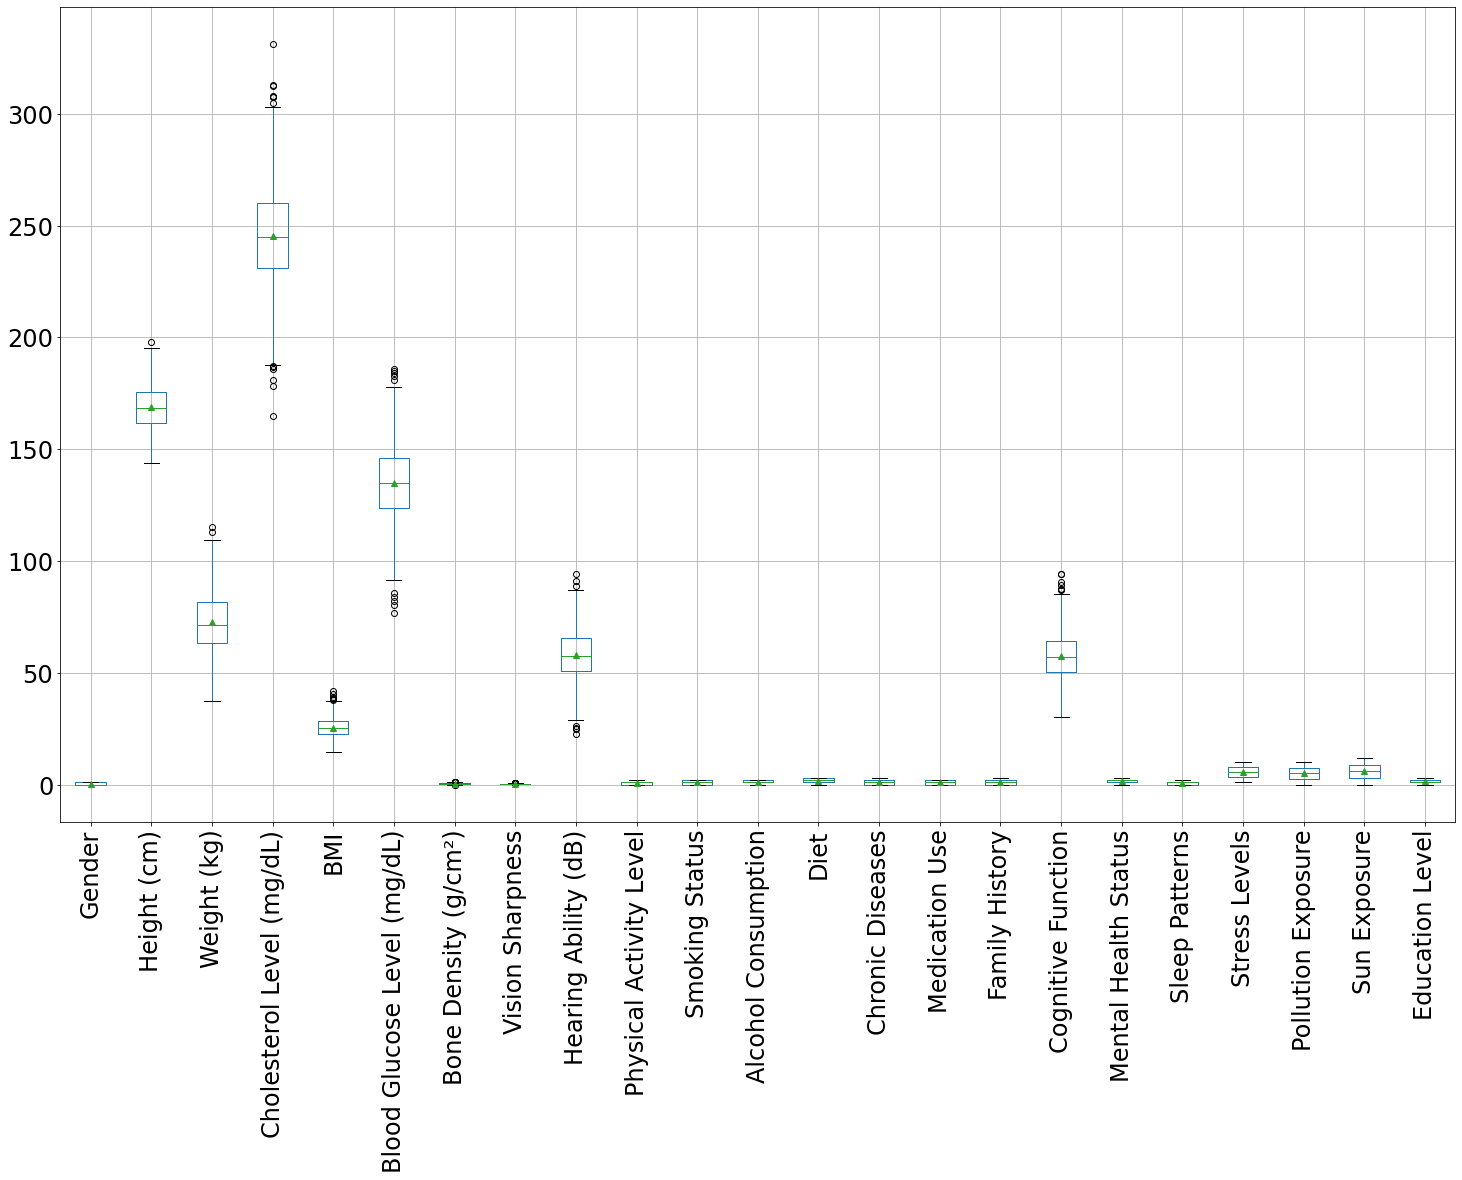

In [59]:
joves = data[data['Age_group'] == 2]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(joves.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
joves.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

In [60]:
joves["Height (cm)"].mean()-2*joves["Height (cm)"].std()

np.float64(150.02845770842129)

In [61]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(joves.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
tjoves = []
for c in columns:
    df = pd.concat([joves[joves[c] > joves[c].mean() + 2*joves[c].std()], joves[joves[c] < joves[c].mean() - 2*joves[c].std()]])
    tjoves.append(df)
tadults = []
for c in columns:
    df = pd.concat([adults[adults[c] > adults[c].mean() + 2*adults[c].std()], adults[adults[c] < adults[c].mean() - 2*adults[c].std()]])
    tadults.append(df)
tavis = []
for c in columns:
    df = pd.concat([avis[avis[c] > avis[c].mean() + 2*avis[c].std()], avis[avis[c] < avis[c].mean() - 2*avis[c].std()]])
    tavis.append(df)

In [62]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(joves[columns[n]].mean() + 2*joves[columns[n]].std()) + " i inferiors a " + str(joves[columns[n]].mean() - 2*joves[columns[n]].std()))
tjoves[n]

Weight (kg)
Valors superiors a 98.84340306123438 i inferiors a 46.52417919527865


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age_group
12,0,173.338,102.464,3,289.219,34.102,124.846,0.651,0.402,84.370,1,1,0,2,3,0,3,61.342,1,1,2.157,8.112,9.848,1,2,2
42,0,170.894,102.930,3,232.859,35.244,164.747,0.403,0.200,58.900,1,2,2,1,1,1,3,54.279,2,1,9.493,4.197,7.662,2,0,2
157,0,166.906,107.075,3,246.181,38.437,117.518,0.552,0.202,63.278,0,2,1,1,2,0,2,38.844,3,1,2.594,0.984,11.481,1,2,2
360,0,170.704,106.177,3,224.363,36.437,135.633,0.829,0.351,47.375,2,1,0,1,1,0,2,63.255,1,1,1.355,0.145,1.431,1,1,2
537,0,170.423,105.450,3,253.119,36.307,113.870,0.429,0.200,40.523,0,1,1,3,3,0,3,76.466,3,1,2.587,4.084,1.340,2,1,2
552,0,185.936,115.343,2,231.589,33.363,125.921,0.842,0.369,60.003,1,1,2,2,1,0,2,77.064,2,1,7.900,9.388,5.128,1,1,2
558,0,181.543,105.947,3,266.661,32.146,113.715,0.178,0.200,59.240,1,1,2,2,2,0,0,55.075,0,0,5.153,9.380,2.792,0,2,2
582,0,165.674,100.629,2,228.411,36.662,142.059,0.420,0.200,63.689,0,1,2,2,2,1,3,56.117,2,1,4.513,6.545,3.052,2,0,2
775,0,170.403,100.114,3,236.237,34.478,101.218,0.559,0.385,45.620,0,0,0,3,1,0,3,63.236,3,0,4.154,7.184,4.457,1,1,2
1171,0,178.005,101.033,3,242.524,31.886,153.909,0.573,0.200,46.864,0,0,1,3,1,0,1,50.857,3,1,3.188,6.364,6.226,2,1,2


In [63]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(adults[columns[n]].mean() + 2*adults[columns[n]].std()) + " i inferiors a " + str(adults[columns[n]].mean() - 2*adults[columns[n]].std()))
tadults[n]

Weight (kg)
Valors superiors a 98.97467470889501 i inferiors a 45.47629909351917


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age_group
54,0,178.232,108.165,3,213.979,34.050,127.026,1.012,0.716,31.414,2,0,2,3,1,1,3,67.432,2,1,8.342,3.735,6.318,0,0,1
56,0,183.572,99.481,3,221.320,29.521,128.121,0.955,0.441,61.223,1,1,1,3,2,0,1,74.529,2,2,7.954,2.649,7.743,1,1,1
72,0,182.371,104.400,3,244.627,31.390,116.977,1.250,0.672,23.375,1,0,2,1,0,2,0,63.309,0,0,4.146,1.141,1.815,2,0,1
73,0,178.290,102.977,2,238.567,32.395,151.863,1.168,0.507,27.837,2,0,1,0,2,0,1,67.120,3,1,8.258,4.592,0.623,1,0,1
134,0,168.358,100.968,3,218.463,35.622,143.719,0.886,0.458,62.202,2,1,0,2,0,2,0,60.342,1,2,2.234,7.339,7.587,1,1,1
159,0,171.146,104.932,3,217.003,35.824,155.232,0.813,0.333,45.521,1,1,1,0,0,2,0,84.179,1,1,7.680,0.252,4.258,1,1,1
218,0,167.536,108.548,3,220.937,38.673,140.368,1.290,0.604,36.938,0,2,2,0,1,1,0,53.296,3,2,5.442,4.536,0.457,1,1,1
220,0,175.298,101.449,3,255.867,33.014,128.801,0.668,0.416,67.311,0,1,2,0,0,1,0,71.790,0,0,3.985,7.231,6.093,2,0,1
249,0,175.728,104.727,2,212.047,33.914,86.274,0.966,0.486,46.356,1,0,2,1,0,2,0,72.285,1,1,4.391,5.336,0.003,2,0,1
435,0,178.774,103.057,2,235.496,32.246,152.399,0.808,0.426,30.489,1,0,2,3,2,0,3,67.241,0,0,9.928,1.028,0.636,3,2,1


In [64]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(avis[columns[n]].mean() + 2*avis[columns[n]].std()) + " i inferiors a " + str(avis[columns[n]].mean() - 2*avis[columns[n]].std()))
tavis[n]

Weight (kg)
Valors superiors a 98.84340306123438 i inferiors a 46.52417919527865


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age_group
12,0,173.338,102.464,3,289.219,34.102,124.846,0.651,0.402,84.370,1,1,0,2,3,0,3,61.342,1,1,2.157,8.112,9.848,1,2,2
42,0,170.894,102.930,3,232.859,35.244,164.747,0.403,0.200,58.900,1,2,2,1,1,1,3,54.279,2,1,9.493,4.197,7.662,2,0,2
157,0,166.906,107.075,3,246.181,38.437,117.518,0.552,0.202,63.278,0,2,1,1,2,0,2,38.844,3,1,2.594,0.984,11.481,1,2,2
360,0,170.704,106.177,3,224.363,36.437,135.633,0.829,0.351,47.375,2,1,0,1,1,0,2,63.255,1,1,1.355,0.145,1.431,1,1,2
537,0,170.423,105.450,3,253.119,36.307,113.870,0.429,0.200,40.523,0,1,1,3,3,0,3,76.466,3,1,2.587,4.084,1.340,2,1,2
552,0,185.936,115.343,2,231.589,33.363,125.921,0.842,0.369,60.003,1,1,2,2,1,0,2,77.064,2,1,7.900,9.388,5.128,1,1,2
558,0,181.543,105.947,3,266.661,32.146,113.715,0.178,0.200,59.240,1,1,2,2,2,0,0,55.075,0,0,5.153,9.380,2.792,0,2,2
582,0,165.674,100.629,2,228.411,36.662,142.059,0.420,0.200,63.689,0,1,2,2,2,1,3,56.117,2,1,4.513,6.545,3.052,2,0,2
775,0,170.403,100.114,3,236.237,34.478,101.218,0.559,0.385,45.620,0,0,0,3,1,0,3,63.236,3,0,4.154,7.184,4.457,1,1,2
1171,0,178.005,101.033,3,242.524,31.886,153.909,0.573,0.200,46.864,0,0,1,3,1,0,1,50.857,3,1,3.188,6.364,6.226,2,1,2


<Axes: xlabel='Age_group'>

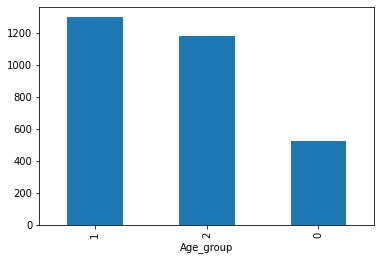

In [65]:
data.Age_group.value_counts().plot(kind='bar')

Scatter matrixes for correlations betwen numerical variables 


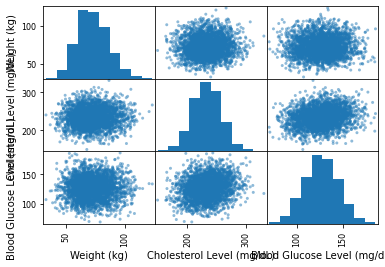

In [66]:
scatter_matrix(data[['Weight (kg)', 'Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)']])
print('Scatter matrixes for correlations betwen numerical variables ')

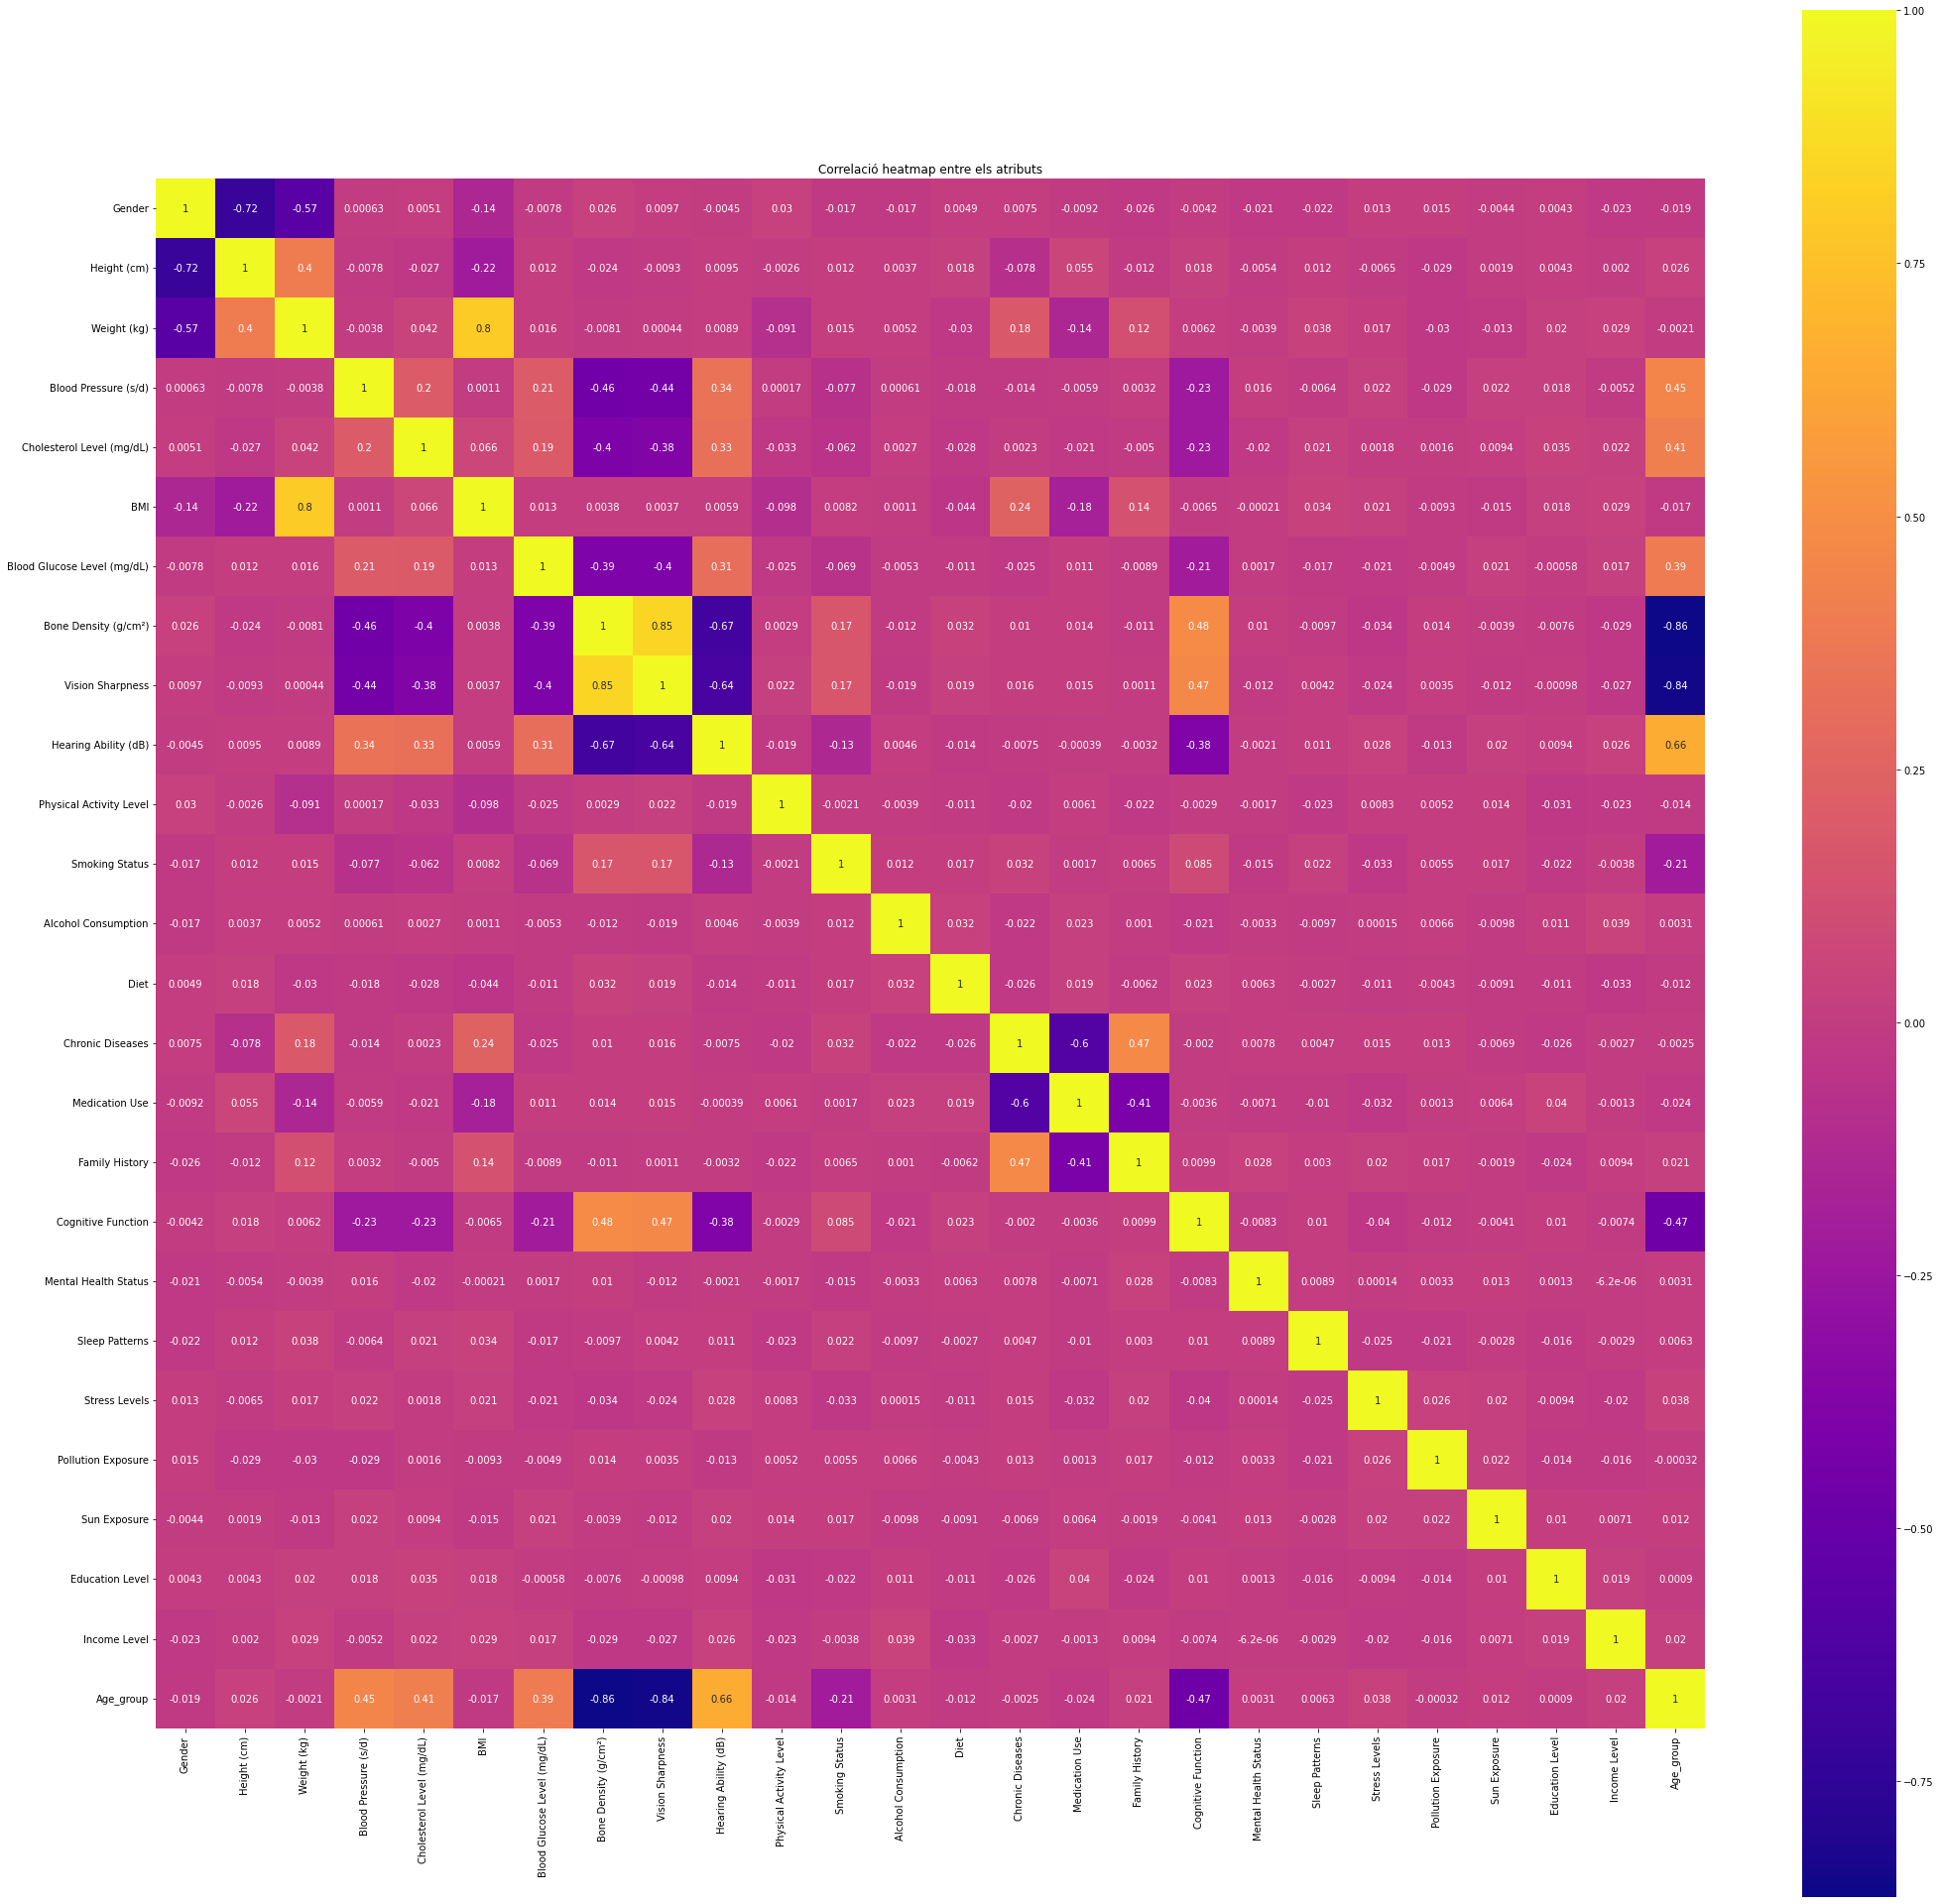

In [67]:
#Passar columnes no numèriques a numèriques
corr = data.corr()
fig, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(corr, cmap='plasma', annot=True, square=True)

plt.title("Correlació heatmap entre els atributs")
plt.show()

### - Divisió de les dades

In [68]:
X = data.drop('Age_group', axis = 1)
y = data['Age_group']

In [69]:
#Ratios de Training i Test
split_ratios = [(0.6, 0.2), (0.7, 0.15), (0.8, 0.1)]
results = []

for train_ratio, val_ratio in split_ratios:
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1-train_ratio, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_ratio/(val_ratio + (1-train_ratio-val_ratio)), random_state=42)

    #Crear model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    val_accuracy = accuracy_score(y_val, model.predict(X_val))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    #Guardar resultats segosn el ratio
    results.append({'train_ratio': train_ratio, 'val_ratio': val_ratio, 'val_accuracy': val_accuracy, 'test_accuracy': test_accuracy})

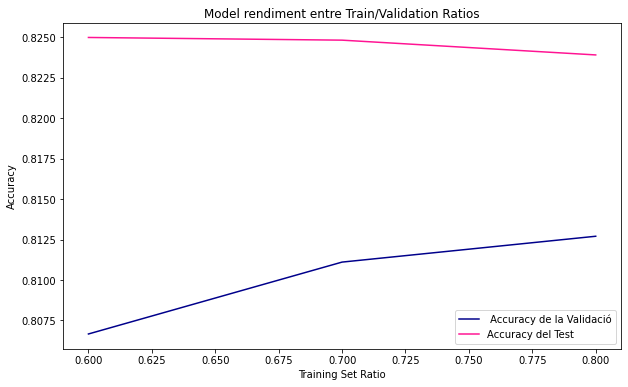

In [70]:
# Representació grafica entre ratios
train_ratios = [r['train_ratio'] for r in results]
val_accuracies = [r['val_accuracy'] for r in results]
test_accuracies = [r['test_accuracy'] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(train_ratios, val_accuracies, label=' Accuracy de la Validació',color='darkblue')
plt.plot(train_ratios, test_accuracies, label='Accuracy del Test',color='deeppink')
plt.xlabel('Training Set Ratio')
plt.ylabel('Accuracy')
plt.title('Model rendiment entre Train/Validation Ratios')
plt.legend()
plt.show()

## <b>Models de mineria de dades</b>

### - Single Fold Cross Validation

In [71]:
data_sf = data.copy()

#Estudiants graduats o han abandonat
data_sf = data_sf[(data_sf['Age_group'] == 0) | (data_sf['Age_group'] == 1) | (data_sf['Age_group'] == 2)]

#Passar de categoric a numeral
data_sf['Age_group'] = LabelEncoder().fit_transform(data_sf['Age_group'])
data_sf.shape

(3000, 26)

In [72]:
#trobar millors parametres- max depth per randomforest
scaler = StandardScaler()

#guardar a X tots els atributs menys el target, a Y el target
X = data_sf.drop('Age_group', axis=1)
y = data_sf['Age_group']

scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=10)

param_grid = {'max_depth': [5, 10, 15, 20, None]}


#Grid busqueda per cassificador validation
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=20), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Millor profunditat trobada:', grid_search.best_params_['max_depth'])

Millor profunditat trobada: 10



 INFORME MODEL SINGLE FOLD CV 

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       104
           1       0.90      0.87      0.89       263
           2       0.95      0.94      0.94       233

    accuracy                           0.90       600
   macro avg       0.89      0.90      0.89       600
weighted avg       0.90      0.90      0.90       600


MATRIU DE CONFUSIÓ 


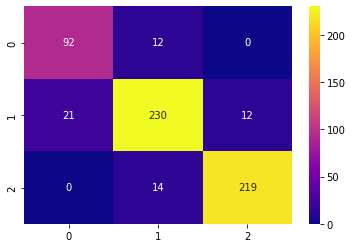


 RESULTATS ACCURACY
Accuracy:  0.9016666666666666
Training Accuracy (entrenat): 0.9741666666666666
Testing Accuracy (test): 0.9016666666666666


In [73]:
rf = RandomForestClassifier(n_estimators=50,max_depth=grid_search.best_params_['max_depth'],min_samples_split=4, min_samples_leaf=2, random_state=20)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

#Fer Prediccions de les dades
y_pred2 = rf.predict(X_test)

print('\n INFORME MODEL SINGLE FOLD CV \n')
print(classification_report(y_test, y_pred2))

#Matriu de confusió
cm = confusion_matrix(y_test, y_pred2)

print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

print("\n RESULTATS ACCURACY")
print("Accuracy: ",accuracy_score(y_test, y_pred2))
print('Training Accuracy (entrenat):',rf.score(X_train,y_train))
print('Testing Accuracy (test):',rf.score(X_test,y_test))

### K-Fold Cross Validation

In [74]:
data_kf = data.copy()

#Estudiants graduats o han abandonat
data_kf = data_kf[(data_kf['Age_group'] == 0) | (data_kf['Age_group'] == 1) | (data_kf['Age_group'] == 2)]

#Passar de categoric a numeral
data_kf['Age_group'] = LabelEncoder().fit_transform(data_kf['Age_group'])
data_kf.shape

(3000, 26)

In [75]:
#guardar a X tots els atributs menys el target, a Y el target
X = data_kf.drop('Age_group', axis=1)
y = data_kf['Age_group']

scaled = scaler.fit_transform(X)
X_train_full, X_test, y_train_full, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)

In [76]:
#Trobar millor parametre n_neighbors pel model de kfold cross validation
param_grid = {'n_neighbors': range(1, 30)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_full, y_train_full)

print("Millor número n_neighors:", grid_search.best_params_['n_neighbors'])

Millor número n_neighors: 18



 INFORME MODEL K FOLD CV 

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       101
           1       0.76      0.81      0.79       273
           2       0.86      0.88      0.87       226

    accuracy                           0.80       600
   macro avg       0.79      0.76      0.77       600
weighted avg       0.80      0.80      0.80       600


MATRIU DE CONFUSIÓ 


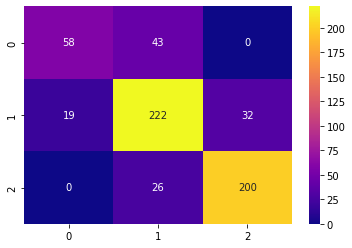


 MITJANES DE CADA FOLD 
Average Accuracy: 0.8075000000000001
Average Precision: 0.8127840626471837
Average Recall: 0.8075000000000001
Average F1 Score: 0.802333806176701


In [77]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#metriques
accuracies = []
precisions = []
recalls = []
f1_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_train_full, y_train_full):
    X_train, X_val = X_train_full[train_index], X_train_full[test_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[test_index]

    #Model amb el nombre n_neighbors millor trobat
    model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val) #Prediccio per cada fold

    # Calculate metrics
    accuracies.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, average='weighted'))
    recalls.append(recall_score(y_val, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_val, y_pred, average='weighted'))

#Fer Prediccions de les dades
final_pred = model.predict(X_test)

print('\n INFORME MODEL K FOLD CV \n')
print(classification_report(y_test, final_pred))

#matriu de confusió
cm = confusion_matrix(y_test, final_pred)
print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

# Mitjanes de les k cross-validation
print("\n MITJANES DE CADA FOLD ")
print(f"Average Accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Average Precision: {sum(precisions) / len(precisions)}")
print(f"Average Recall: {sum(recalls) / len(recalls)}")
print(f"Average F1 Score: {sum(f1_scores) / len(f1_scores)}")

### - Naive Bayes

In [78]:
data2 = data.copy()

#Separació entre data (tot menys age_group i age), i label (age_group)
X = data2.iloc[:, :-2] 
y = data2['Age_group']  

#Divisió entre training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 

gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=y,cv=cv)
np.mean(cv_scores)

np.float64(0.8786666666666665)

In [79]:
predicted = cross_val_predict(GaussianNB(), X=X, y=y,  cv=cv)  

print(confusion_matrix(y, predicted))
print(accuracy_score(y, predicted))

[[ 465   57    0]
 [ 119 1081   98]
 [   0   90 1090]]
0.8786666666666667


In [80]:
print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       522
           1       0.88      0.83      0.86      1298
           2       0.92      0.92      0.92      1180

    accuracy                           0.88      3000
   macro avg       0.86      0.88      0.87      3000
weighted avg       0.88      0.88      0.88      3000



In [81]:

def filterp(th,ProbClass1):
    """ Given a treshold "th" and a set of probabilies of belonging to class 1 "ProbClass1", return predictions """ 
    y=np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>th:
            y[i]=1
    return y  

clf = GaussianNB()
lth=[]

# We do a 10 fold crossvalidation with 10 iterations
kf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train, y_train):
    X_train2, X_test2 = X.loc[train_index], X.loc[test_index]
    y_train2, y_test2 = y.loc[train_index], y.loc[test_index]

    # Train with the training data of the iteration 
    clf.fit(X_train2, y_train2)
    # Obtaining probablity predictions for test data of the iterarion
    probs = clf.predict_proba(X_test2)
    # Collect probabilities of belonging to class 1
    ProbClass1 = probs[:,1]
    # Sort probabilities and generate pairs (threshold, f1-for-that-threshold) 
    res = np.array([[th, f1_score(y_test2, filterp(th, ProbClass1), average='macro')] for th in np.sort(ProbClass1)])

    # Uncomment the following lines if you want to plot at each iteration how f1-score evolves increasing the threshold 
    #plt.plot(res[:,0],res[:,1])
    #plt.show()

    # Find the threshold that has maximum value of f1-score
    maxF = np.max(res[:,1])
    pl = np.argmax(res[:,1])
    optimal_th = res[pl,0]
    
    # Store the optimal threshold found for the current iteration
    lth.append(optimal_th)

# Compute the average threshold for all 10 iterations    
thdef = np.mean(lth)
print("Selected threshold in 10-fold cross validation:", thdef)
print()

Selected threshold in 10-fold cross validation: 0.3448279715278383



In [82]:
# Train a classifier with the whole training data 
clf = GaussianNB()
clf.fit(X_train, y_train)
# Obtain probabilities for data on test set
probs = clf.predict_proba(X_test)
# Generate predictions using probabilities and threshold found on 10 folds cross-validation


In [83]:
pred = filterp(thdef,probs[:,1])
# Print results with this prediction vector
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.27      0.88      0.42       160
           1       0.87      0.85      0.86       392
           2       0.00      0.00      0.00       348

    accuracy                           0.53       900
   macro avg       0.38      0.58      0.43       900
weighted avg       0.43      0.53      0.45       900



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       160
           1       0.88      0.82      0.85       392
           2       0.92      0.93      0.92       348

    accuracy                           0.87       900
   macro avg       0.86      0.88      0.87       900
weighted avg       0.88      0.87      0.87       900



### - KNN

In [85]:
accuracies = []

for k in range(1, 16):
    knn = nb.KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X=X_train, y=y_train,  cv=15)
    accuracies.append(np.mean(cv_scores))
    print(f"Accuracy {k} neighbour: {np.mean(cv_scores)}")

Accuracy 1 neighbour: 0.5919047619047618
Accuracy 2 neighbour: 0.5695238095238094
Accuracy 3 neighbour: 0.6038095238095238
Accuracy 4 neighbour: 0.6257142857142857
Accuracy 5 neighbour: 0.6357142857142857
Accuracy 6 neighbour: 0.6442857142857144
Accuracy 7 neighbour: 0.6595238095238096
Accuracy 8 neighbour: 0.6523809523809524
Accuracy 9 neighbour: 0.6542857142857142
Accuracy 10 neighbour: 0.6576190476190477
Accuracy 11 neighbour: 0.6523809523809523
Accuracy 12 neighbour: 0.6576190476190475
Accuracy 13 neighbour: 0.6604761904761904
Accuracy 14 neighbour: 0.6657142857142857
Accuracy 15 neighbour: 0.6604761904761904


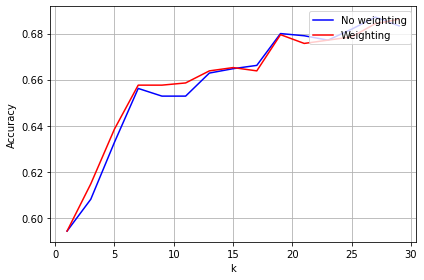

In [86]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [87]:
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)
clf.fit(X_train, y_train)

print("Millors Parametres:",clf.best_params_, "Accuracy=", clf.best_score_)

Millors Parametres: {'n_neighbors': 27, 'weights': 'uniform'} Accuracy= 0.6871428571428572



 INFORME MODEL KNN 

              precision    recall  f1-score   support

           0       0.62      0.40      0.49       160
           1       0.61      0.72      0.66       392
           2       0.79      0.76      0.77       348

    accuracy                           0.68       900
   macro avg       0.67      0.63      0.64       900
weighted avg       0.68      0.68      0.67       900


MATRIU DE CONFUSIÓ 


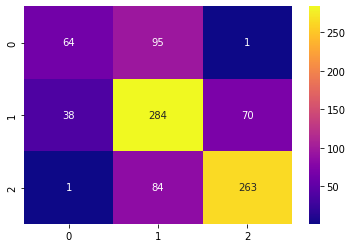


 RESULTATS ACCURACY
Accuracy  0.6788888888888889


In [88]:

parval=clf.best_params_ #millors parametres calculats
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)

#Fer Prediccions de les dades
pred=knc.predict(X_test)

print('\n INFORME MODEL KNN \n')
print(classification_report(y_test, pred))

#matriu de confusió
cm = confusion_matrix(y_test, pred)
print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.show()

print("\n RESULTATS ACCURACY")
print("Accuracy ",accuracy_score(y_test, pred))

### - Support Vector Machines

In [61]:
import sklearn    
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#knc = LinearSVC() 
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))

Confusion matrix on test set:
 [[130  30   0]
 [ 35 321  36]
 [  0  21 327]]

Accuracy on test set:  0.8644444444444445


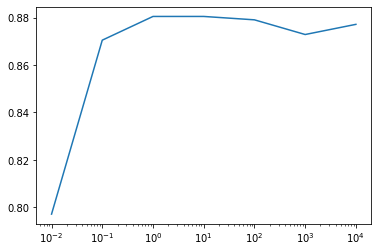

Confusion matrix on test set:
 [[130  30   0]
 [ 35 321  36]
 [  0  21 327]]

Accuracy on test set:  0.8644444444444445

Best value of parameter C found:  {'C': np.float64(1.0)}

Number of supports:  639 ( 598 of them have slacks)
Prop. of supports:  0.30428571428571427


In [62]:
# List of C values to test. We usualy test diverse orders of magnitude
#Cs = np.logspace(-3, 11, num=15, base=10.0)
Cs = np.logspace(-2, 4, num=7, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

# Let's apply the best C parameter found to the test set
parval=grid_search.best_params_
#knc = LinearSVC(C=parval['C']) 
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

In [43]:
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc=4)


training_scores, test_scores = validation_curve(SVC(kernel='linear'), X_train, y_train, param_name="C", param_range=Cs,cv=10)
plot_validation_curve(range(len(Cs)), training_scores, test_scores)
plt.xticks(range(len(Cs)), Cs,rotation='vertical');
plt.ylim([0.6, 1])
plt.show()

NameError: name 'SVC' is not defined

### - Decision Trees

In [ ]:
## Train Naive Bayes model
clf = BernoulliNB()
pred = clf.fit(X_train, y_train).predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

[[  3  88  69]
 [  1 270 121]
 [  0 224 124]]

Accuracy: 0.4411111111111111

              precision    recall  f1-score   support

           0       0.75      0.02      0.04       160
           1       0.46      0.69      0.55       392
           2       0.39      0.36      0.37       348

    accuracy                           0.44       900
   macro avg       0.54      0.35      0.32       900
weighted avg       0.49      0.44      0.39       900



(0.40885967864237244, 0.47388040142027293)

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print(np.mean(scores))

[0.44666667 0.44666667 0.43       0.43       0.43       0.45333333
 0.42666667 0.48       0.44666667 0.41666667]
0.4406666666666667


In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
pred = clf.fit(X_train, y_train).predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()
print("Accuracy on test set:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(classification_report(y_test, pred))
epsilon = accuracy_score(y_test, pred)
print("Confidence interval: ",proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

scores = sklearn.model_selection.cross_val_score(clf, X, y, cv=10)
print("Accuracy on 10 fold cross-validation:", scores)
print(np.mean(scores))

## Print tree
fig = plt.gcf()
fig.set_size_inches(200, 100)

tree.plot_tree(clf, filled=True,rounded=True,feature_names=list(X.columns.values))
#fig.savefig('tree.png')
plt.show()

[[124  36   0]
 [ 47 300  45]
 [  0  41 307]]

Accuracy on test set: 0.8122222222222222

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       160
           1       0.80      0.77      0.78       392
           2       0.87      0.88      0.88       348

    accuracy                           0.81       900
   macro avg       0.80      0.81      0.80       900
weighted avg       0.81      0.81      0.81       900

Confidence interval:  (0.7851006590174017, 0.8367837414781074)
Accuracy on 10 fold cross-validation: [0.86666667 0.83666667 0.81333333 0.82666667 0.81       0.83
 0.81       0.82       0.81666667 0.84666667]
0.8276666666666668


In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print(np.mean(scores))

[0.85333333 0.83333333 0.84       0.82666667 0.79666667 0.81666667
 0.82       0.81333333 0.83333333 0.84333333]
0.8276666666666666


### - Meta methods

In [ ]:
cv=50
clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Params fo Knn= {'n_neighbors': 29, 'weights': 'distance'} Accuracy= 0.6806666666666666
Accuracy: 0.880 [Naive Bayes]
Accuracy: 0.681 [Knn (3)]
Accuracy: 0.828 [Dec. Tree]


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

Accuracy: 0.859 [Majority Voting]


In [ ]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.859 [Weighted Voting]


#### Bagging

In [ ]:
lb=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(BaggingClassifier(DecisionTreeClassifier(), n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]    
print()
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(BaggingClassifier(DecisionTreeClassifier(), n_estimators=nest, max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.807 [1]
Accuracy: 0.817 [2]
Accuracy: 0.853 [5]
Accuracy: 0.859 [10]
Accuracy: 0.865 [20]
Accuracy: 0.875 [50]
Accuracy: 0.874 [100]

Accuracy: 0.674 [1]
Accuracy: 0.601 [2]
Accuracy: 0.750 [5]
Accuracy: 0.816 [10]
Accuracy: 0.851 [20]
Accuracy: 0.857 [50]
Accuracy: 0.869 [100]


#### Random forest

In [ ]:
lrf=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.766 [1]
Accuracy: 0.750 [2]
Accuracy: 0.836 [5]
Accuracy: 0.858 [10]
Accuracy: 0.867 [20]
Accuracy: 0.875 [50]
Accuracy: 0.881 [100]


In [ ]:
lext=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.735 [1]
Accuracy: 0.707 [2]
Accuracy: 0.824 [5]
Accuracy: 0.846 [10]
Accuracy: 0.862 [20]
Accuracy: 0.873 [50]
Accuracy: 0.877 [100]


#### Boosting

In [ ]:
lboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.735 [1]
Accuracy: 0.776 [2]
Accuracy: 0.781 [5]
Accuracy: 0.795 [10]
Accuracy: 0.791 [20]
Accuracy: 0.787 [50]
Accuracy: 0.785 [100]


In [ ]:
lboodt=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.857 [1]
Accuracy: 0.829 [2]
Accuracy: 0.809 [5]
Accuracy: 0.825 [10]
Accuracy: 0.845 [20]
Accuracy: 0.862 [50]
Accuracy: 0.871 [100]


In [ ]:
lgbboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.750 [1]
Accuracy: 0.756 [2]
Accuracy: 0.847 [5]
Accuracy: 0.868 [10]
Accuracy: 0.872 [20]
Accuracy: 0.875 [50]
Accuracy: 0.872 [100]


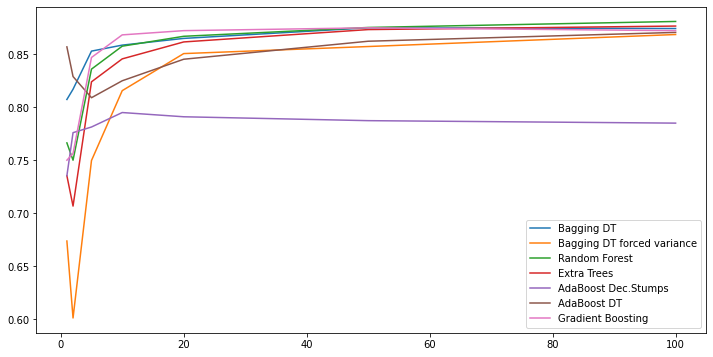

In [ ]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100], lb, label="Bagging DT")
plt.plot([1,2,5,10,20,50,100], lb2, label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100], lrf, label="Random Forest")
plt.plot([1,2,5,10,20,50,100], lext, label="Extra Trees")
plt.plot([1,2,5,10,20,50,100], lboo, label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100], lboodt, label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100], lgbboo, label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

#### Feature selection with Forest of trees

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  

[0.0031642  0.02107035 0.02013042 0.02809787 0.0405254  0.02168345
 0.03976994 0.29592434 0.22493158 0.10730358 0.00634646 0.02168666
 0.00580333 0.00714198 0.00589333 0.00530183 0.00683898 0.05109111
 0.00816747 0.00605884 0.02228771 0.02267178 0.02106658 0.00704281]


In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='accuracy')))

(3000, 4)
0.6410000000000001
0.654


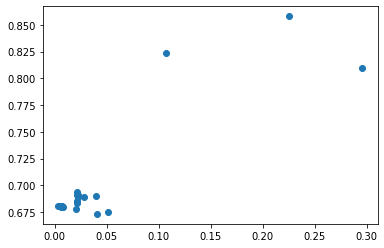

Best threshold:  0.22493158104965938


In [ ]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [ ]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)
print(X_new.shape)

print('Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cv, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cv, scoring='accuracy')))

(3000, 2)
Original:  0.5923333333333334
With FS:  0.858
